# Title: Clustering Algorithm 

### Objective:
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

### Dataset

In [6]:
# Load the Iris dataset
from sklearn.datasets import load_iris
import pandas as pd


In [53]:

# Create a DataFrame with features and target
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Adding species column to represent target labels

# Display the dataset with the species column
print("Dataset with species column:")
print(df.head())
df.shape

Dataset with species column:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


(150, 5)

### Data Preprocessing

In [55]:
# Drop the species column as part of preprocessing
# NOTE: Since clustering is an unsupervised technique, it does not use target labels (species) for training.
df = df.drop('species', axis=1)

print("Dataset after dropping species column:")
print(df.head())
df.shape

Dataset after dropping species column:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


(150, 4)

### 2.Clustering Algorithm Implementation

### A) KMeans Clustering 

### How KMeans Clustering Works:

Step 1: Choose k random centroids (center points) for the clusters.
Step 2: Assign each data point to the nearest centroid, forming clusters.
Step 3: Recalculate the centroids by finding the mean of the points in each cluster.
Step 4: Repeat steps 2 and 3 until the centroids no longer change significantly (convergence).
### Why KMeans is Suitable for the Iris Dataset:
The Iris dataset has distinct clusters with well-separated species, making it easy for KMeans to find groups.
The dataset has 3 known species, so applying KMeans with n_clusters=3 is a natural fit.


In [33]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')  # 3 clusters for Iris dataset
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df)  # Assign clusters



In [57]:
# 2. Perform PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
reduced_data = pca.fit_transform(df)  # Apply PCA to features
reduced_data.shape

(150, 2)

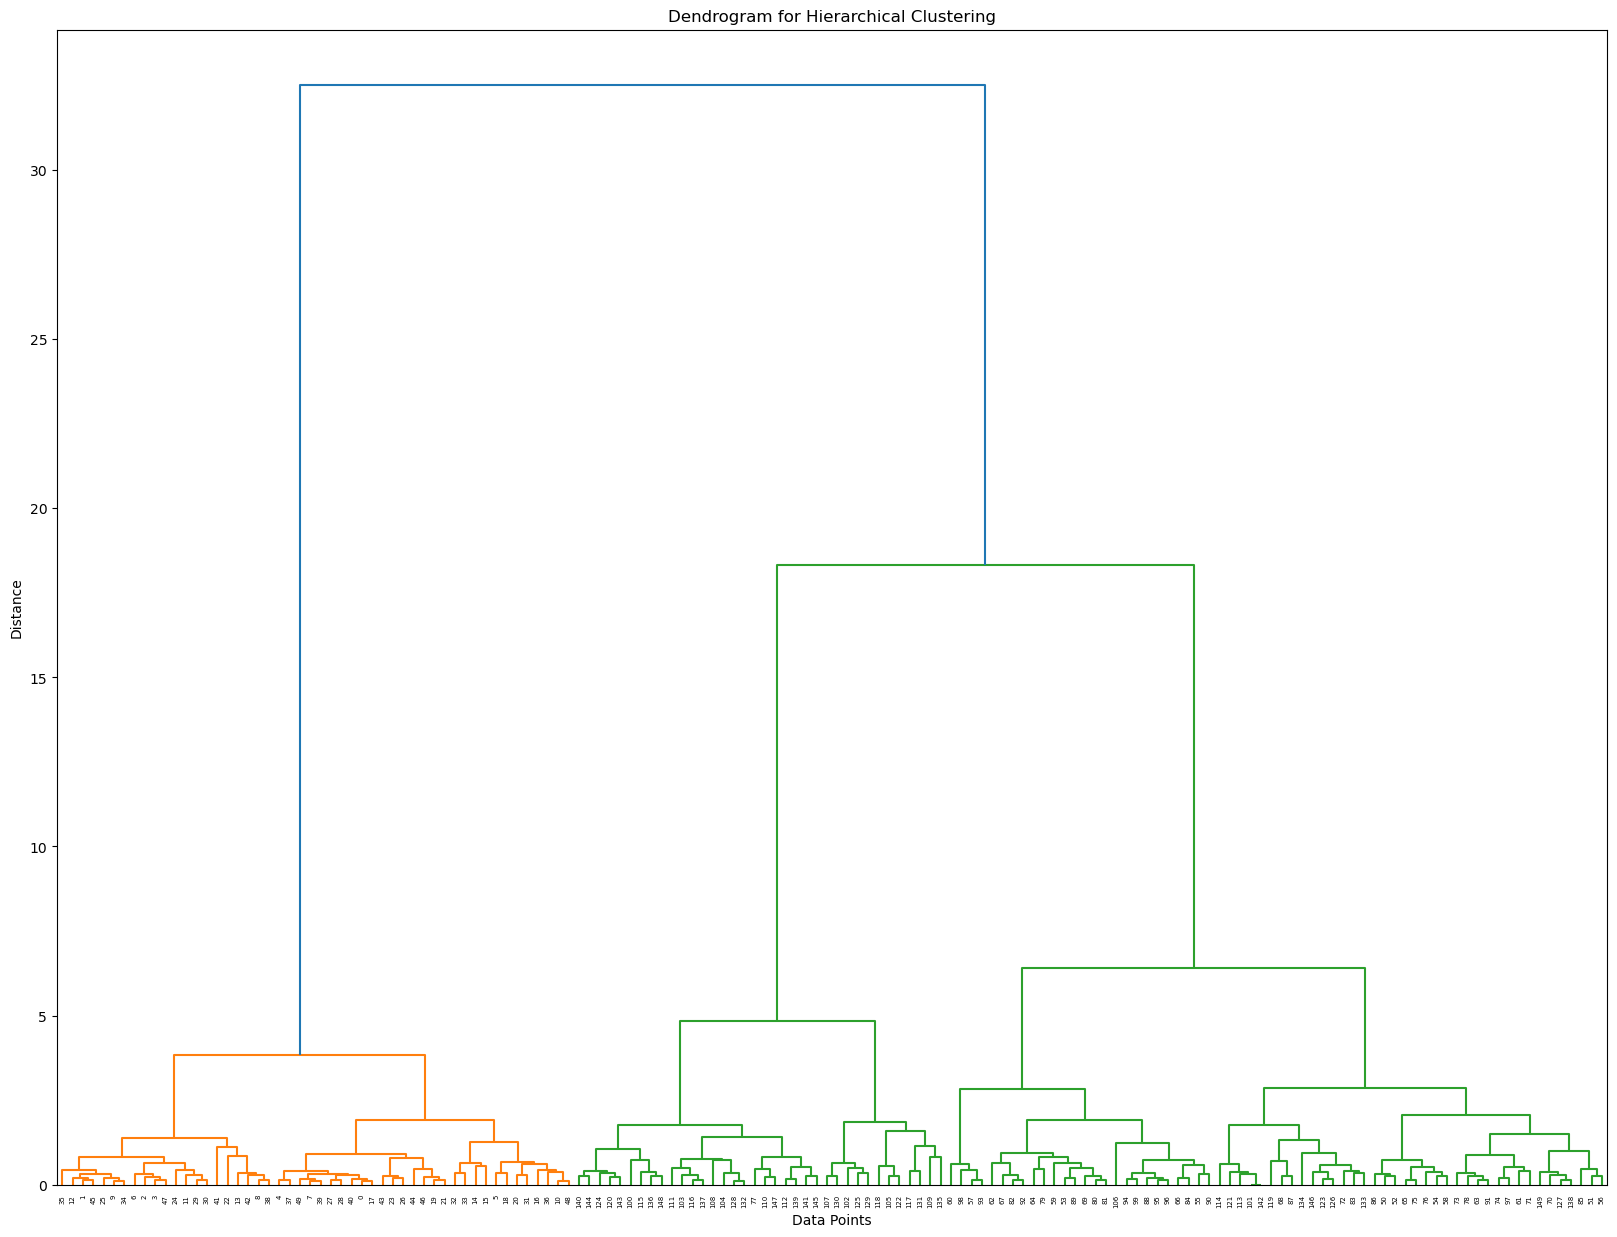

In [39]:
# 3. Plotting the Dendrogram
plt.figure(figsize=(20, 15))  # Set figure size
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))  # 'ward' minimizes variance within clusters
plt.title("Dendrogram for Hierarchical Clustering")  
plt.xlabel("Data Points")  
plt.ylabel("Distance")  
plt.show()  


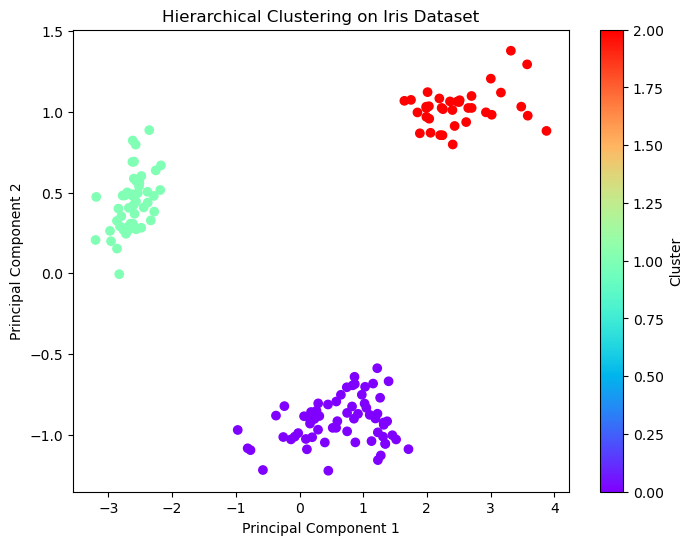

In [41]:
# 4. Plot the clusters in 2D using PCA
plt.figure(figsize=(8, 6)) 
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Hierarchical_Cluster'], cmap='rainbow')  
plt.title("Hierarchical Clustering on Iris Dataset")  
plt.xlabel("Principal Component 1")  
plt.ylabel("Principal Component 2")  
plt.colorbar(label='Cluster')  
plt.show()  

### B) Hierarchical Clustering


### How it works:

Hierarchical Clustering creates a tree-like structure called a dendrogram.
It starts by treating each data point as a single cluster and then merges the closest clusters based on their similarity.
The process continues until all data points are grouped into one large cluster.
It uses a distance metric (e.g., Euclidean distance) to measure the similarity between clusters.
Agglomerative (bottom-up) hierarchical clustering is the most common type used, where small clusters are merged into larger ones.
### Why it might be suitable for the Iris dataset:
Iris dataset has distinct clusters based on flower species, making it suitable for hierarchical clustering.
Dendrogram visualization helps us understand how different species are related or differ from each other at different levels of similarity.
Hierarchical clustering does not require us to specify the number of clusters beforehand (unlike KMeans), and it gives us more flexibility in analyzing the data.

In [45]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Use 'ward' method to minimize variance within clusters
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df)  # Fit the model and predict cluster labels



In [59]:
# 2. Perform PCA to reduce the data to 2D for easy visualization
pca = PCA(n_components=2)  # Reduce dimensions to 2 for easier plotting
reduced_data = pca.fit_transform(df)  # Apply PCA on feature data
reduced_data.shape

(150, 2)

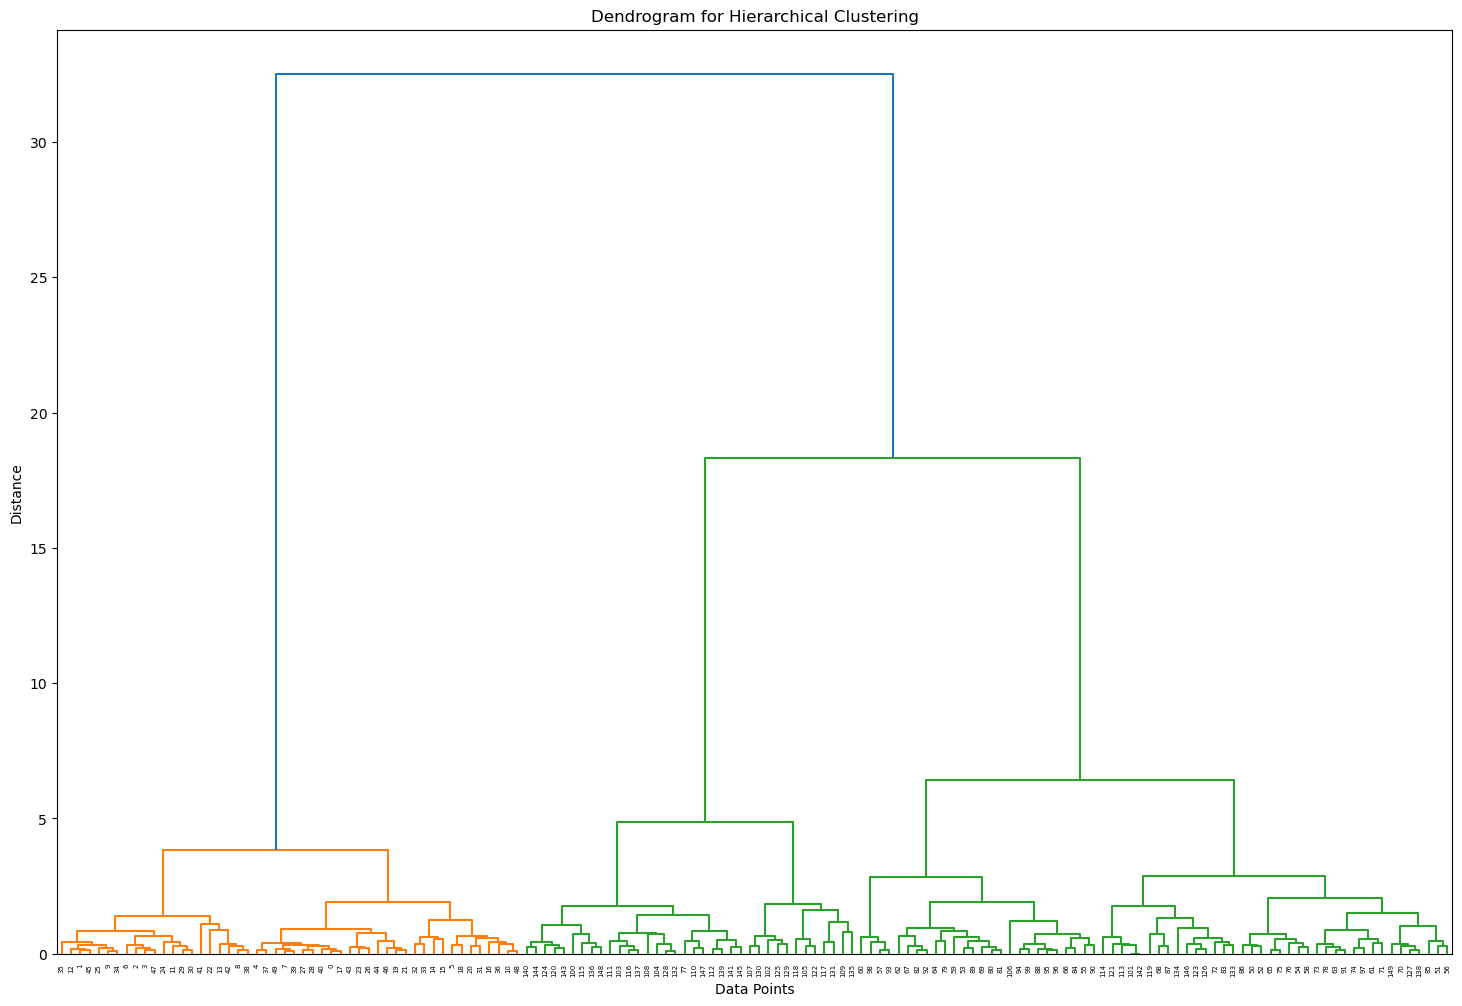

In [49]:
# 3. Plotting the Dendrogram
plt.figure(figsize=(18, 12))  # Set figure size
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))  # Generate the dendrogram
plt.title("Dendrogram for Hierarchical Clustering")  
plt.xlabel("Data Points") 
plt.ylabel("Distance")  
plt.show()  


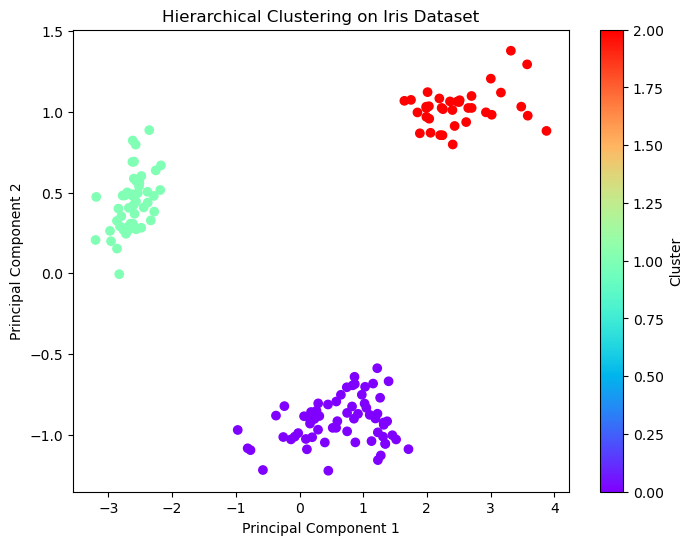

In [51]:
# 4. Plot the clusters in 2D using PCA
plt.figure(figsize=(8, 6))  
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Hierarchical_Cluster'], cmap='rainbow')  
plt.title("Hierarchical Clustering on Iris Dataset")  
plt.xlabel("Principal Component 1") 
plt.ylabel("Principal Component 2")  
plt.colorbar(label='Cluster')  
plt.show()  